# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.323581e+01     1.459926e+01
 * time: 0.004102945327758789
     1     6.083644e+01     8.946664e+00
 * time: 0.012148857116699219
     2     5.434565e+01     1.432257e+01
 * time: 0.031210899353027344
     3     3.826892e+01     1.012976e+01
 * time: 0.05716586112976074
     4     2.751240e+01     8.128545e+00
 * time: 0.08391594886779785
     5     1.963868e+01     5.452818e+00
 * time: 0.10637879371643066
     6     1.556110e+01     5.158079e+00
 * time: 0.2112419605255127
     7     7.848293e+00     2.192731e+00
 * time: 0.23035597801208496
     8     7.026942e+00     1.878828e+00
 * time: 0.2493607997894287
     9     6.542025e+00     1.555711e+00
 * time: 0.2685108184814453
    10     6.199496e+00     1.315613e+00
 * time: 0.28383398056030273
    11     5.955896e+00     1.090568e+00
 * time: 0.2983968257904053
    12     5.910584e+00     1.679490e+00
 * time: 0.30980396270751953
    13     5.839632e+00     1.521378e+00
 * time: 

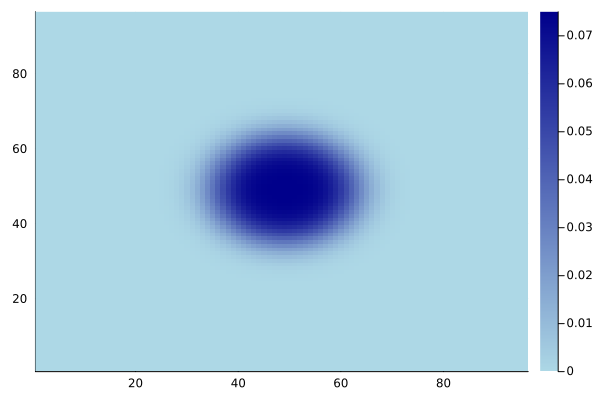

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)